In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os 
from astropy import units as u
import sys
import pandas as pd

In [2]:
hdu = fits.open('/Users/quinncasey/Desktop/research/eboss/spLine_trim_dr16_eboss.fits')

In [3]:
H_ALPHA_FLUX = hdu[1].data['H_ALPHA_FLUX'].tolist()
H_ALPHA_FLUX_ERR = hdu[1].data['H_ALPHA_FLUX_ERR'].tolist()
H_BETA_FLUX = hdu[1].data['H_BETA_FLUX'].tolist()
H_BETA_FLUX_ERR = hdu[1].data['H_BETA_FLUX_ERR'].tolist()
NII_6584_FLUX = hdu[1].data['NII_6584_FLUX'].tolist()
NII_6584_FLUX_ERR = hdu[1].data['NII_6584_FLUX_ERR'].tolist()
OII_3727_FLUX = hdu[1].data['OII_3727_FLUX'].tolist()
OII_3727_FLUX_ERR = hdu[1].data['OII_3727_FLUX_ERR'].tolist()
OIII_5007_FLUX = hdu[1].data['OIII_5007_FLUX'].tolist()
OIII_5007_FLUX_ERR = hdu[1].data['OIII_5007_FLUX_ERR'].tolist()

Z = hdu[1].data['Z'].tolist()

In [4]:
data_names = ['H_ALPHA_FLUX', 'H_ALPHA_FLUX_ERR', 'H_BETA_FLUX', 'H_BETA_FLUX_ERR', 'NII_6584_FLUX', 'NII_6584_FLUX_ERR', 'OIII_5007_FLUX', 'OIII_5007_FLUX_ERR', 'OII_3727_FLUX', 'OII_3727_FLUX_ERR', 'Z'] 
data_dict = {'H_ALPHA_FLUX' : H_ALPHA_FLUX, 'H_ALPHA_FLUX_ERR' : H_ALPHA_FLUX_ERR, 'H_BETA_FLUX' : H_BETA_FLUX, 'H_BETA_FLUX_ERR' : H_BETA_FLUX_ERR, 'NII_6584_FLUX' : NII_6584_FLUX,  'NII_6584_FLUX_ERR' : NII_6584_FLUX_ERR, 'OIII_5007_FLUX' : OIII_5007_FLUX, 'OIII_5007_FLUX_ERR' : OIII_5007_FLUX_ERR, 'OII_3727_FLUX':OII_3727_FLUX, 'OII_3727_FLUX_ERR':OII_3727_FLUX_ERR, 'Z':Z}
df = pd.DataFrame(data_dict)

In [5]:
for name in data_names: 
    df = df.loc[df[name].notnull()]

In [6]:
# Making SNR cuts
df = df.loc[(df['NII_6584_FLUX']/df['NII_6584_FLUX_ERR']) > 3]
df = df.loc[(df['H_ALPHA_FLUX']/df['H_ALPHA_FLUX_ERR']) > 3]
df = df.loc[(df['H_BETA_FLUX']/df['H_BETA_FLUX_ERR']) > 3]
df = df.loc[(df['OIII_5007_FLUX']/df['OIII_5007_FLUX_ERR']) > 3]
df = df.loc[(df['OII_3727_FLUX']/df['OII_3727_FLUX_ERR']) > 3]

df1 = df.query('Z > 0.1 & Z <=0.2')

In [7]:
df

,H_ALPHA_FLUX,H_ALPHA_FLUX_ERR,H_BETA_FLUX,H_BETA_FLUX_ERR,NII_6584_FLUX,NII_6584_FLUX_ERR,OIII_5007_FLUX,OIII_5007_FLUX_ERR,OII_3727_FLUX,OII_3727_FLUX_ERR,Z
15,212.416092,2.891719,60.099800,1.349523,80.189949,1.547476,16.714176,0.916771,98.708862,3.190818,0.049064
29,53.094452,1.977745,9.892110,1.334563,12.758877,1.134638,9.458583,1.202161,27.533510,1.807330,0.228498
32,361.902130,6.575371,87.052773,2.273923,118.281067,3.198118,96.730667,2.161498,204.694687,3.752417,0.105281
61,46.662724,1.139682,9.928170,0.848596,9.678543,1.180141,30.265347,1.003380,33.591476,1.498797,0.286323
72,71.619888,1.746683,22.257740,1.190700,2.585195,0.858081,104.004333,1.844970,52.847717,1.762716,0.199954
...,...,...,...,...,...,...,...,...,...,...,...
1909500,5.046541,0.446960,2.181885,0.408353,1.057275,0.352161,3.347554,0.406102,9.078620,1.470029,0.013147
1910139,27.831688,2.972200,7.110903,1.360870,14.297498,2.602332,8.384744,1.371489,19.426441,1.763488,0.261273
1910223,19.997824,1.401312,5.421577,0.805376,4.484944,0.986075,5.751052,0.796390,13.868649,1.261060,0.396967
1910362,42.060108,1.881482,8.629753,1.273430,9.190403,1.263805,11.231365,1.252577,22.824642,2.235442,0.324565


In [8]:
df1

,H_ALPHA_FLUX,H_ALPHA_FLUX_ERR,H_BETA_FLUX,H_BETA_FLUX_ERR,NII_6584_FLUX,NII_6584_FLUX_ERR,OIII_5007_FLUX,OIII_5007_FLUX_ERR,OII_3727_FLUX,OII_3727_FLUX_ERR,Z
32,361.902130,6.575371,87.052773,2.273923,118.281067,3.198118,96.730667,2.161498,204.694687,3.752417,0.105281
72,71.619888,1.746683,22.257740,1.190700,2.585195,0.858081,104.004333,1.844970,52.847717,1.762716,0.199954
108,91.511169,2.003538,16.944899,1.187491,27.282827,2.096210,14.159435,1.204987,34.092461,2.451308,0.105692
175,55.245682,1.222163,16.339369,0.804314,4.694409,0.552655,46.889687,1.068646,46.592781,1.794244,0.131985
266,524.339722,8.071745,132.595428,2.842736,157.718536,3.558419,166.473419,2.980740,304.371552,4.660732,0.105160
...,...,...,...,...,...,...,...,...,...,...,...
1886183,43.346359,1.362117,13.532630,0.984515,3.704603,0.766523,48.445332,1.861789,34.148190,1.944120,0.112364
1897489,13.890966,1.386438,3.915086,1.183270,2.787330,0.901945,4.328385,1.349987,8.947477,1.849116,0.185585
1897902,48.708511,1.122954,14.992145,0.889941,1.827003,0.532531,99.319557,1.519871,22.740940,1.493842,0.132279
1905567,10.558468,1.143505,4.449336,1.143337,4.384293,1.147266,7.683566,1.670206,10.072718,2.110671,0.179970


In [9]:
LY_ALPHA_FLUX = hdu[1].data['LY_ALPHA_FLUX'].tolist()                                              
LY_ALPHA_FLUX_ERR = hdu[1].data['LY_ALPHA_FLUX_ERR'].tolist()                                                                                     
NV_1240_FLUX = hdu[1].data['NV_1240_FLUX'].tolist()                                                       
NV_1240_FLUX_ERR = hdu[1].data['NV_1240_FLUX_ERR'].tolist()                                                                                                      
CIV_1550_FLUX = hdu[1].data['CIV_1550_FLUX'].tolist()                                                      
CIV_1550_FLUX_ERR = hdu[1].data['CIV_1550_FLUX_ERR'].tolist()                                                                                                     
HEII_1640_FLUX = hdu[1].data['HEII_1640_FLUX'].tolist()                                                     
HEII_1640_FLUX_ERR = hdu[1].data['HEII_1640_FLUX_ERR'].tolist()                                                                                                    
CIII_1909_FLUX = hdu[1].data['CIII_1909_FLUX'].tolist()                                                     
CIII_1909_FLUX_ERR = hdu[1].data['CIII_1909_FLUX_ERR'].tolist()                                                                                                   
MGII_2800_FLUX = hdu[1].data['MGII_2800_FLUX'].tolist()                                                     
MGII_2800_FLUX_ERR = hdu[1].data['MGII_2800_FLUX_ERR'].tolist()                                                                                                                                                                                                       
NEIII_3869_FLUX = hdu[1].data['NEIII_3869_FLUX'].tolist()                                                    
NEIII_3869_FLUX_ERR = hdu[1].data['NEIII_3869_FLUX_ERR'].tolist()                                                                                                
H_EPSILON_FLUX = hdu[1].data['H_EPSILON_FLUX'].tolist()                                                     
H_EPSILON_FLUX_ERR = hdu[1].data['H_EPSILON_FLUX_ERR'].tolist()                                                                                                
H_GAMMA_FLUX = hdu[1].data['H_GAMMA_FLUX'].tolist()                                                       
H_GAMMA_FLUX_ERR = hdu[1].data['H_GAMMA_FLUX_ERR'].tolist()                                                                                                       
OIII_4363_FLUX = hdu[1].data['OIII_4363_FLUX'].tolist()                                                     
OIII_4363_FLUX_ERR = hdu[1].data['OIII_4363_FLUX_ERR'].tolist()                                                                                                  
OIII_4959_FLUX = hdu[1].data['OIII_4959_FLUX'].tolist()                                                     
OIII_4959_FLUX_ERR = hdu[1].data['OIII_4959_FLUX_ERR'].tolist()                                                                                                                                                                                                            
SII_6717_FLUX = hdu[1].data['SII_6717_FLUX'].tolist()                                                      
SII_6717_FLUX_ERR = hdu[1].data['SII_6717_FLUX_ERR'].tolist()                                                                                                                                                      

In [10]:
data_names_extra = ['LY_ALPHA_FLUX', 'LY_ALPHA_FLUX_ERR', 
              'NV_1240_FLUX', 'NV_1240_FLUX_ERR', 
              'CIV_1550_FLUX', 'CIV_1550_FLUX_ERR', 
              'HEII_1640_FLUX', 'HEII_1640_FLUX_ERR', 
              'CIII_1909_FLUX', 'CIII_1909_FLUX_ERR', 
              'MGII_2800_FLUX', 'MGII_2800_FLUX_ERR',
              'NEIII_3869_FLUX', 'NEIII_3869_FLUX_ERR',
              'H_EPSILON_FLUX', 'H_EPSILON_FLUX_ERR', 
              'H_GAMMA_FLUX', 'H_GAMMA_FLUX_ERR',
              'OIII_4363_FLUX', 'OIII_4363_FLUX_ERR',
              'OIII_4959_FLUX', 'OIII_4959_FLUX_ERR',
              'SII_6717_FLUX', 'SII_6717_FLUX_ERR']

data_extra = {'LY_ALPHA_FLUX':LY_ALPHA_FLUX, 'LY_ALPHA_FLUX_ERR':LY_ALPHA_FLUX_ERR, 
           'NV_1240_FLUX':NV_1240_FLUX, 'NV_1240_FLUX_ERR':NV_1240_FLUX_ERR,  
           'CIV_1550_FLUX':CIV_1550_FLUX, 'CIV_1550_FLUX_ERR':CIV_1550_FLUX_ERR, 
           'HEII_1640_FLUX':HEII_1640_FLUX, 'HEII_1640_FLUX_ERR':HEII_1640_FLUX_ERR, 
           'CIII_1909_FLUX':CIII_1909_FLUX, 'CIII_1909_FLUX_ERR':CIII_1909_FLUX_ERR,
           'MGII_2800_FLUX':MGII_2800_FLUX, 'MGII_2800_FLUX_ERR':MGII_2800_FLUX, 
           'NEIII_3869_FLUX':NEIII_3869_FLUX, 'NEIII_3869_FLUX_ERR':NEIII_3869_FLUX_ERR,  
           'H_EPSILON_FLUX':H_EPSILON_FLUX, 'H_EPSILON_FLUX_ERR':H_EPSILON_FLUX_ERR, 
           'H_GAMMA_FLUX':H_GAMMA_FLUX, 'H_GAMMA_FLUX_ERR':H_GAMMA_FLUX_ERR, 
           'OIII_4363_FLUX':OIII_4363_FLUX, 'OIII_4363_FLUX_ERR':OIII_4363_FLUX_ERR, 
           'OIII_4959_FLUX':OIII_4959_FLUX, 'OIII_4959_FLUX_ERR':OIII_4959_FLUX_ERR, 
           'SII_6717_FLUX':SII_6717_FLUX, 'SII_6717_FLUX_ERR':SII_6717_FLUX_ERR}

In [11]:
df_extra = pd.DataFrame(data_extra)
for name in data_names_extra: 
    df_extra = df_extra.loc[df_extra[name].notnull()]

In [12]:
df_extra

,LY_ALPHA_FLUX,LY_ALPHA_FLUX_ERR,NV_1240_FLUX,NV_1240_FLUX_ERR,CIV_1550_FLUX,CIV_1550_FLUX_ERR,HEII_1640_FLUX,HEII_1640_FLUX_ERR,CIII_1909_FLUX,CIII_1909_FLUX_ERR,...,H_EPSILON_FLUX,H_EPSILON_FLUX_ERR,H_GAMMA_FLUX,H_GAMMA_FLUX_ERR,OIII_4363_FLUX,OIII_4363_FLUX_ERR,OIII_4959_FLUX,OIII_4959_FLUX_ERR,SII_6717_FLUX,SII_6717_FLUX_ERR
0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.000000,...,-2.089175,1.341526,7.207095,2.163069,-0.369577,1.242037,0.564413,0.395700,0.0,-1.0
1,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.000000,...,-1.913989,0.874277,-6.748097,2.091406,1.427243,1.716738,-0.024132,0.282596,0.0,-1.0
2,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.000000,...,-1.675699,0.708074,1.942883,2.075572,-0.309430,0.757952,0.555141,0.265725,0.0,-1.0
3,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.000000,...,-3.379236,0.960232,-0.615123,1.444552,-0.530884,1.169598,-0.093792,0.423734,0.0,-1.0
4,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.000000,...,-1.122464,0.618107,1.356978,2.042662,-0.097028,0.639090,-0.652465,0.339076,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910802,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-0.779006,2.677557,...,-1.260005,0.648049,0.917360,0.925999,-0.068474,1.940881,3.520405,3.499178,0.0,-1.0
1910803,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.000000,...,-0.469590,0.722176,3.009331,0.988352,0.729869,2.795967,4.323225,0.427234,0.0,-1.0
1910804,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-3.563211,3.228468,...,-1.434057,0.761208,4.349562,2.172885,-1.571627,1.763746,17.360786,10.107788,0.0,-1.0
1910805,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.879411,4.191927,...,-0.031534,1.159113,14.498630,1.817483,-0.072871,2.492410,2.952515,2.716820,0.0,-1.0


In [13]:
frames = [df1, df_extra]
df_result = pd.concat(frames) 
df_result

,H_ALPHA_FLUX,H_ALPHA_FLUX_ERR,H_BETA_FLUX,H_BETA_FLUX_ERR,NII_6584_FLUX,NII_6584_FLUX_ERR,OIII_5007_FLUX,OIII_5007_FLUX_ERR,OII_3727_FLUX,OII_3727_FLUX_ERR,...,H_EPSILON_FLUX,H_EPSILON_FLUX_ERR,H_GAMMA_FLUX,H_GAMMA_FLUX_ERR,OIII_4363_FLUX,OIII_4363_FLUX_ERR,OIII_4959_FLUX,OIII_4959_FLUX_ERR,SII_6717_FLUX,SII_6717_FLUX_ERR
32,361.902130,6.575371,87.052773,2.273923,118.281067,3.198118,96.730667,2.161498,204.694687,3.752417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,71.619888,1.746683,22.257740,1.190700,2.585195,0.858081,104.004333,1.844970,52.847717,1.762716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,91.511169,2.003538,16.944899,1.187491,27.282827,2.096210,14.159435,1.204987,34.092461,2.451308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,55.245682,1.222163,16.339369,0.804314,4.694409,0.552655,46.889687,1.068646,46.592781,1.794244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,524.339722,8.071745,132.595428,2.842736,157.718536,3.558419,166.473419,2.980740,304.371552,4.660732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.260005,0.648049,0.917360,0.925999,-0.068474,1.940881,3.520405,3.499178,0.0,-1.0
1910803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.469590,0.722176,3.009331,0.988352,0.729869,2.795967,4.323225,0.427234,0.0,-1.0
1910804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.434057,0.761208,4.349562,2.172885,-1.571627,1.763746,17.360786,10.107788,0.0,-1.0
1910805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031534,1.159113,14.498630,1.817483,-0.072871,2.492410,2.952515,2.716820,0.0,-1.0


In [14]:
lams2 = {'Ly_alpha':1215.24,
        'NV_1240':1240,
        'CIV_1550':1550,
        'HeII_1640':1640,
        'CIII_1909':1909,
        'MgII_2800':2800,
        'OII_3727':3727,
        'NeIII_3869':3869,
        'H_epsilon':3971,
        'H_gamma':4341.68,
        'OIII_4363':4363,
        'H_beta':4862.68,
        'OIII_4959':4959,
        'OIII_5007':5007,
        'H_alpha':6564.61,
        'NII_6584':6584,
        'SII_6717':6717}

In [15]:
def k(lamb):
    klam = -4.12 + (2.56/(lamb)) + (-0.152/(lamb**2)) + (0.0104/(lamb**3)) + 2.93
    return klam

In [16]:
EBV = (2.5/(k(4862.691)-k(6564.632)))*np.log10 ((df_result.H_ALPHA_FLUX/df_result.H_BETA_FLUX)/2.86)

In [17]:
def DC(Lobs,k,EBV):
    Lint=Lobs*(10**(0.4*k*EBV))
    return Lint

def correct(line,lams,EBV):
    cl=DC(line,k(lams),EBV)
    return cl

In [18]:
df_result.columns

Index(['H_ALPHA_FLUX', 'H_ALPHA_FLUX_ERR', 'H_BETA_FLUX', 'H_BETA_FLUX_ERR',
       'NII_6584_FLUX', 'NII_6584_FLUX_ERR', 'OIII_5007_FLUX',
       'OIII_5007_FLUX_ERR', 'OII_3727_FLUX', 'OII_3727_FLUX_ERR', 'Z',
       'LY_ALPHA_FLUX', 'LY_ALPHA_FLUX_ERR', 'NV_1240_FLUX',
       'NV_1240_FLUX_ERR', 'CIV_1550_FLUX', 'CIV_1550_FLUX_ERR',
       'HEII_1640_FLUX', 'HEII_1640_FLUX_ERR', 'CIII_1909_FLUX',
       'CIII_1909_FLUX_ERR', 'MGII_2800_FLUX', 'MGII_2800_FLUX_ERR',
       'NEIII_3869_FLUX', 'NEIII_3869_FLUX_ERR', 'H_EPSILON_FLUX',
       'H_EPSILON_FLUX_ERR', 'H_GAMMA_FLUX', 'H_GAMMA_FLUX_ERR',
       'OIII_4363_FLUX', 'OIII_4363_FLUX_ERR', 'OIII_4959_FLUX',
       'OIII_4959_FLUX_ERR', 'SII_6717_FLUX', 'SII_6717_FLUX_ERR'],
      dtype='object')

In [19]:
#flux correction for each emission line

LY_ALPHA_FLUX_COR = correct(df_result['LY_ALPHA_FLUX'], k(lams2['Ly_alpha']), EBV)

NV_1240_FLUX_COR = correct(df_result['NV_1240_FLUX'], k(lams2['NV_1240']), EBV)

CIV_1550_FLUX_COR = correct(df_result['CIV_1550_FLUX'], k(lams2['CIV_1550']), EBV)

HEII_1640_FLUX_COR = correct(df_result['HEII_1640_FLUX'], k(lams2['HeII_1640']), EBV)

CIII_1909_FLUX_COR = correct(df_result['CIII_1909_FLUX'], k(lams2['CIII_1909']), EBV)

MGII_2800_FLUX_COR = correct(df_result['MGII_2800_FLUX'], k(lams2['MgII_2800']), EBV)

OII_3727_FLUX_COR = correct(df_result['OII_3727_FLUX'], k(lams2['OII_3727']), EBV)

NEIII_3869_FLUX_COR = correct(df_result['NEIII_3869_FLUX'], k(lams2['NeIII_3869']), EBV)

H_EPSILON_FLUX_COR = correct(df_result['H_EPSILON_FLUX'], k(lams2['H_epsilon']), EBV)

H_GAMMA_FLUX_COR = correct(df_result['H_GAMMA_FLUX'], k(lams2['H_gamma']), EBV)

OIII_4959_FLUX_COR = correct(df_result['OIII_4959_FLUX'], k(lams2['OIII_4959']), EBV)

H_BETA_FLUX_COR = correct(df_result['H_BETA_FLUX'], k(lams2['H_beta']), EBV)

OIII_4363_FLUX_COR = correct(df_result['OIII_4363_FLUX'], k(lams2['OIII_4363']), EBV)

OIII_5007_FLUX_COR = correct(df_result['OIII_5007_FLUX'], k(lams2['OIII_5007']), EBV)

H_ALPHA_FLUX_COR = correct(df_result['H_ALPHA_FLUX'], k(lams2['H_alpha']), EBV)

NII_6584_FLUX_COR = correct(df_result['NII_6584_FLUX'], k(lams2['NII_6584']), EBV)

SII_6717_FLUX_COR = correct(df_result['SII_6717_FLUX'], k(lams2['SII_6717']), EBV)

In [20]:
# FLUX ERROR CORRECTION FOR EACH EMISSION LINE

LY_ALPHA_FLUX_ERR_COR = LY_ALPHA_FLUX_COR*(np.sqrt((np.array(df_result['LY_ALPHA_FLUX_ERR'])/np.array(df_result['LY_ALPHA_FLUX']))**2+ ((k(lams2['Ly_alpha'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

NV_1240_FLUX_ERR_COR = NV_1240_FLUX_COR*(np.sqrt((np.array(df_result['NV_1240_FLUX_ERR'])/np.array(df_result['NV_1240_FLUX']))**2+ ((k(lams2['NV_1240'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

CIV_1550_FLUX_ERR_COR = CIV_1550_FLUX_COR*(np.sqrt((np.array(df_result['CIV_1550_FLUX_ERR'])/np.array(df_result['CIV_1550_FLUX']))**2+ ((k(lams2['CIV_1550'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

HEII_1640_FLUX_ERR_COR = HEII_1640_FLUX_COR*(np.sqrt((np.array(df_result['HEII_1640_FLUX_ERR'])/np.array(df_result['HEII_1640_FLUX']))**2+ ((k(lams2['HeII_1640'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

CIII_1909_FLUX_ERR_COR = CIII_1909_FLUX_COR*(np.sqrt((np.array(df_result['CIII_1909_FLUX_ERR'])/np.array(df_result['CIII_1909_FLUX']))**2+ ((k(lams2['CIII_1909'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

MGII_2800_FLUX_ERR_COR = MGII_2800_FLUX_COR*(np.sqrt((np.array(df_result['MGII_2800_FLUX_ERR'])/np.array(df_result['MGII_2800_FLUX']))**2+ ((k(lams2['MgII_2800'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

OII_3727_FLUX_ERR_COR = OII_3727_FLUX_COR*(np.sqrt((np.array(df_result['OII_3727_FLUX_ERR'])/np.array(df_result['OII_3727_FLUX']))**2+ ((k(lams2['OII_3727'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

NEIII_3869_FLUX_ERR_COR = NEIII_3869_FLUX_COR*(np.sqrt((np.array(df_result['NEIII_3869_FLUX_ERR'])/np.array(df_result['NEIII_3869_FLUX']))**2+ ((k(lams2['NeIII_3869'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

H_EPSILON_FLUX_ERR_COR = H_EPSILON_FLUX_COR*(np.sqrt((np.array(df_result['H_EPSILON_FLUX_ERR'])/np.array(df_result['H_EPSILON_FLUX']))**2+ ((k(lams2['H_epsilon'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

H_GAMMA_FLUX_ERR_COR = H_GAMMA_FLUX_COR*(np.sqrt((np.array(df_result['H_GAMMA_FLUX_ERR'])/np.array(df_result['H_GAMMA_FLUX']))**2+ ((k(lams2['H_gamma'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

OIII_4363_FLUX_ERR_COR = OIII_4363_FLUX_COR*(np.sqrt((np.array(df_result['OIII_4363_FLUX_ERR'])/np.array(df_result['OIII_4363_FLUX']))**2+ ((k(lams2['OIII_4363'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

H_BETA_FLUX_ERR_COR = H_BETA_FLUX_COR*(np.sqrt((np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2+ ((k(lams2['H_beta'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

OIII_4959_FLUX_ERR_COR = OIII_4959_FLUX_COR*(np.sqrt((np.array(df_result['OIII_4959_FLUX_ERR'])/np.array(df_result['OIII_4959_FLUX']))**2+ ((k(lams2['OIII_4959'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

OIII_5007_FLUX_ERR_COR = OIII_5007_FLUX_COR*(np.sqrt((np.array(df_result['OIII_5007_FLUX_ERR'])/np.array(df_result['OIII_5007_FLUX']))**2+ ((k(lams2['OIII_5007'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

H_ALPHA_FLUX_ERR_COR = H_ALPHA_FLUX_COR*(np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+ ((k(lams2['H_alpha'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

NII_6584_FLUX_ERR_COR = NII_6584_FLUX_COR*(np.sqrt((np.array(df_result['NII_6584_FLUX_ERR'])/np.array(df_result['NII_6584_FLUX']))**2+ ((k(lams2['NII_6584'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

SII_6717_FLUX_ERR_COR = SII_6717_FLUX_COR*(np.sqrt((np.array(df_result['SII_6717_FLUX_ERR'])/np.array(df_result['SII_6717_FLUX']))**2+ ((k(lams2['SII_6717'])/(k(4862.691)-k(6564.632)))* np.sqrt((np.array(df_result['H_ALPHA_FLUX_ERR'])/np.array(df_result['H_ALPHA_FLUX']))**2+(np.array(df_result['H_BETA_FLUX_ERR'])/np.array(df_result['H_BETA_FLUX']))**2))**2))

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value enco

In [23]:
def groves_1():
    x = np.linspace(-2, 2, 500)
    y = 2.1*x + 0.85
    return [x, y]

def groves_2():
    x = np.linspace(-2, 2, 500)
    y = -1.2*x - 0.7
    return [x, y]

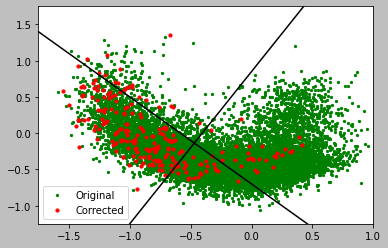

In [24]:
plt.style.use('grayscale')

x1 = np.log10(df_result['NII_6584_FLUX']/df_result['OII_3727_FLUX'])
y1 = np.log10(df_result['OIII_5007_FLUX']/df_result['OII_3727_FLUX'])

x2 = np.log10(NII_6584_FLUX_COR/OII_3727_FLUX_COR)
y2 = np.log10(OIII_5007_FLUX_COR/OII_3727_FLUX_COR)

plt.plot(groves_1()[0], groves_1()[1], c='black')
plt.plot(groves_2()[0], groves_2()[1], c='black')

plt.xlim(-1.75,1.0)
plt.ylim(-1.25,1.75)

original = plt.scatter(x1, y1, c='g', s=5)
corrected = plt.scatter(x2, y2, c='r', s=10)
plt.legend((original, corrected), ('Original', 'Corrected'))
plt.show()


In [28]:
LY_ALPHA_FLUX_COR = LY_ALPHA_FLUX_COR.tolist()
NV_1240_FLUX_COR = NV_1240_FLUX_COR.tolist()
CIV_1550_FLUX_COR = CIV_1550_FLUX_COR.tolist()
HEII_1640_FLUX_COR = HEII_1640_FLUX_COR.tolist()
CIII_1909_FLUX_COR = CIII_1909_FLUX_COR.tolist()
MGII_2800_FLUX_COR = MGII_2800_FLUX_COR.tolist()
OII_3727_FLUX_COR = OII_3727_FLUX_COR.tolist()
NEIII_3869_FLUX_COR = NEIII_3869_FLUX_COR.tolist()
H_EPSILON_FLUX_COR = H_EPSILON_FLUX_COR.tolist()
H_GAMMA_FLUX_COR = H_GAMMA_FLUX_COR.tolist()
OIII_4363_FLUX_COR = OIII_4363_FLUX_COR.tolist()
H_BETA_FLUX_COR = H_BETA_FLUX_COR.tolist()
OIII_4959_FLUX_COR = OIII_4959_FLUX_COR.tolist()
OIII_5007_FLUX_COR = OIII_5007_FLUX_COR.tolist()
H_ALPHA_FLUX_COR = H_ALPHA_FLUX_COR.tolist()
NII_6584_FLUX_COR = NII_6584_FLUX_COR.tolist()
SII_6717_FLUX_COR = SII_6717_FLUX_COR.tolist()

In [29]:
LY_ALPHA_FLUX_ERR_COR = LY_ALPHA_FLUX_ERR_COR.tolist()
NV_1240_FLUX_ERR_COR = NV_1240_FLUX_ERR_COR.tolist()
CIV_1550_FLUX_ERR_COR = CIV_1550_FLUX_ERR_COR.tolist()
HEII_1640_FLUX_ERR_COR = HEII_1640_FLUX_ERR_COR.tolist()
CIII_1909_FLUX_ERR_COR = CIII_1909_FLUX_ERR_COR.tolist()
MGII_2800_FLUX_ERR_COR = MGII_2800_FLUX_ERR_COR.tolist()
OII_3727_FLUX_ERR_COR = OII_3727_FLUX_ERR_COR.tolist()
NEIII_3869_FLUX_ERR_COR = NEIII_3869_FLUX_ERR_COR.tolist()
H_EPSILON_FLUX_ERR_COR = H_EPSILON_FLUX_ERR_COR.tolist()
H_GAMMA_FLUX_ERR_COR = H_GAMMA_FLUX_ERR_COR.tolist()
OIII_4363_FLUX_ERR_COR = OIII_4363_FLUX_ERR_COR.tolist()
H_BETA_FLUX_ERR_COR = H_BETA_FLUX_ERR_COR.tolist()
OIII_4959_FLUX_ERR_COR = OIII_4959_FLUX_ERR_COR.tolist()
OIII_5007_FLUX_ERR_COR = OIII_5007_FLUX_ERR_COR.tolist()
H_ALPHA_FLUX_ERR_COR = H_ALPHA_FLUX_ERR_COR.tolist()
NII_6584_FLUX_ERR_COR = NII_6584_FLUX_ERR_COR.tolist()
SII_6717_FLUX_ERR_COR = SII_6717_FLUX_ERR_COR.tolist()

In [40]:
Z1 = df_result['Z']
print(len(Z1))

1921807


In [41]:
data_names = ['LY_ALPHA_FLUX_COR', 'LY_ALPHA_FLUX_ERR_COR', 
              'NV_1240_FLUX_COR','NV_1240_FLUX_ERR_COR',
             'CIV_1550_FLUX_COR', 'CIV_1550_FLUX_ERR_COR',
             'HEII_1640_FLUX_COR', 'HEII_1640_FLUX_ERR_COR',
             'CIII_1909_FLUX_COR', 'CIII_1909_FLUX_ERR_COR', 
             'MGII_2800_FLUX_COR', 'MGII_2800_FLUX_ERR_COR',
             'OII_3727_FLUX_COR', 'OII_3727_FLUX_ERR_COR',
             'NEIII_3869_FLUX_COR', 'NEIII_3869_FLUX_ERR_COR',
             'H_EPSILON_FLUX_COR', 'H_EPSILON_FLUX_ERR_COR',
             'H_GAMMA_FLUX_COR', 'H_GAMMA_FLUX_ERR_COR',
             'OIII_4363_FLUX_COR', 'OIII_4363_FLUX_ERR_COR',
             'H_BETA_FLUX_COR', 'H_BETA_FLUX_ERR_COR',
             'OIII_4959_FLUX_COR', 'OIII_4959_FLUX_ERR_COR',
             'OIII_5007_FLUX_COR', 'OIII_5007_FLUX_ERR_COR',
             'H_ALPHA_FLUX_COR', 'H_ALPHA_FLUX_ERR_COR',
             'NII_6584_FLUX_COR', 'NII_6584_FLUX_ERR_COR',
             'SII_6717_FLUX_COR', 'SII_6717_FLUX_ERR_COR',
             'Z1']

In [42]:
data_df_cor = {'LY_ALPHA_FLUX_COR':LY_ALPHA_FLUX_COR, 
               'LY_ALPHA_FLUX_ERR_COR':LY_ALPHA_FLUX_ERR_COR,
               
                'NV_1240_FLUX_COR':LY_ALPHA_FLUX_COR,
                'NV_1240_FLUX_ERR_COR':LY_ALPHA_FLUX_ERR_COR,
               
                'CIV_1550_FLUX_COR':CIV_1550_FLUX_COR,
                 'CIV_1550_FLUX_ERR_COR':CIV_1550_FLUX_ERR_COR,
               
                'HEII_1640_FLUX_COR':HEII_1640_FLUX_COR, 
               'HEII_1640_FLUX_ERR_COR':HEII_1640_FLUX_ERR_COR, 
               
                'CIII_1909_FLUX_COR':CIII_1909_FLUX_COR, 
               'CIII_1909_FLUX_ERR_COR':CIII_1909_FLUX_ERR_COR,
               
                'MGII_2800_FLUX_COR':MGII_2800_FLUX_COR,
               'MGII_2800_FLUX_ERR_COR':MGII_2800_FLUX_ERR_COR,
               
                'OII_3727_FLUX_COR':OII_3727_FLUX_COR,
               'OII_3727_FLUX_ERR_COR':OII_3727_FLUX_ERR_COR, 
               
                'NEIII_3869_FLUX_COR':NEIII_3869_FLUX_COR,
               'NEIII_3869_FLUX_ERR_COR':NEIII_3869_FLUX_ERR_COR,
               
                'H_EPSILON_FLUX_COR':H_EPSILON_FLUX_COR, 
               'H_EPSILON_FLUX_ERR_COR':H_EPSILON_FLUX_ERR_COR, 
               
                'H_GAMMA_FLUX_COR':H_GAMMA_FLUX_COR,
               'H_GAMMA_FLUX_ERR_COR':H_GAMMA_FLUX_ERR_COR,
               
                'OIII_4363_FLUX_COR':OIII_4363_FLUX_COR, 
               'OIII_4363_FLUX_ERR_COR':OIII_4363_FLUX_ERR_COR,
               
                'H_BETA_FLUX_COR':H_BETA_FLUX_COR,
               'H_BETA_FLUX_ERR_COR':H_BETA_FLUX_ERR_COR, 
               
                'OIII_4959_FLUX_COR':OIII_4959_FLUX_COR, 
               'OIII_4959_FLUX_ERR_COR':OIII_4959_FLUX_ERR_COR, 
               
                'OIII_5007_FLUX_COR':OIII_5007_FLUX_COR, 
               'OIII_5007_FLUX_ERR_COR':OIII_5007_FLUX_ERR_COR, 
               
                'H_ALPHA_FLUX_COR':H_ALPHA_FLUX_COR, 
               'H_ALPHA_FLUX_ERR_COR':H_ALPHA_FLUX_ERR_COR, 
               
                'NII_6584_FLUX_COR':NII_6584_FLUX_COR, 
               'NII_6584_FLUX_ERR_COR':NII_6584_FLUX_ERR_COR, 
               
                'SII_6717_FLUX_COR':SII_6717_FLUX_COR,
               'SII_6717_FLUX_ERR_COR':SII_6717_FLUX_ERR_COR, 
               
              'Z1':Z1}

In [43]:
print(len(LY_ALPHA_FLUX_COR))
print(len(LY_ALPHA_FLUX_ERR_COR))
print(len(NV_1240_FLUX_COR))
print(len(NV_1240_FLUX_ERR_COR))
print(len(CIV_1550_FLUX_COR))
print(len(CIV_1550_FLUX_ERR_COR))
print(len(HEII_1640_FLUX_COR))
print(len(HEII_1640_FLUX_ERR_COR))
print(len(CIII_1909_FLUX_COR))
print(len(CIII_1909_FLUX_ERR_COR))
print(len(MGII_2800_FLUX_COR))
print(len(MGII_2800_FLUX_ERR_COR))
print(len(OII_3727_FLUX_COR))
print(len(OII_3727_FLUX_ERR_COR))
print(len(NEIII_3869_FLUX_COR))
print(len(NEIII_3869_FLUX_ERR_COR))
print(len(H_EPSILON_FLUX_COR))
print(len(H_EPSILON_FLUX_ERR_COR))
print(len(H_GAMMA_FLUX_COR))
print(len(H_GAMMA_FLUX_ERR_COR))
print(len(OIII_4363_FLUX_COR))
print(len(OIII_4363_FLUX_ERR_COR))
print(len(H_BETA_FLUX_COR))
print(len(H_BETA_FLUX_ERR_COR))
print(len(OIII_4959_FLUX_COR))
print(len(OIII_4959_FLUX_ERR_COR))
print(len(OIII_5007_FLUX_COR))
print(len(OIII_5007_FLUX_ERR_COR))
print(len(H_ALPHA_FLUX_COR))
print(len(H_ALPHA_FLUX_ERR_COR))
print(len(NII_6584_FLUX_COR))
print(len(NII_6584_FLUX_ERR_COR))
print(len(SII_6717_FLUX_COR))
print(len(SII_6717_FLUX_ERR_COR))


1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807
1921807


In [44]:
df_cor = pd.DataFrame(data_df_cor)

In [45]:
df_cor

,LY_ALPHA_FLUX_COR,LY_ALPHA_FLUX_ERR_COR,NV_1240_FLUX_COR,NV_1240_FLUX_ERR_COR,CIV_1550_FLUX_COR,CIV_1550_FLUX_ERR_COR,HEII_1640_FLUX_COR,HEII_1640_FLUX_ERR_COR,CIII_1909_FLUX_COR,CIII_1909_FLUX_ERR_COR,...,OIII_4959_FLUX_ERR_COR,OIII_5007_FLUX_COR,OIII_5007_FLUX_ERR_COR,H_ALPHA_FLUX_COR,H_ALPHA_FLUX_ERR_COR,NII_6584_FLUX_COR,NII_6584_FLUX_ERR_COR,SII_6717_FLUX_COR,SII_6717_FLUX_ERR_COR,Z1
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.105281
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.199954
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.105692
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.131985
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.105160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_cor.to_pickle('0.1-0.2-dust_cor-data.pkl')